In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

In [2]:
%matplotlib inline

In [3]:
mlc_df=pd.read_csv("C:/Users/iulia/Documents/NSS/projects/mlc-project-pythons-on-a-plane/data/MLC_data.csv")

In [4]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                                     Non-Null Count   Dtype  
---  ------                                     --------------   -----  
 0    ISRC                                      98240 non-null   object 
 1   Country Code                               98303 non-null   object 
 2   Registrant Code                            98303 non-null   object 
 3   Year of Reference                          98239 non-null   float64
 4   Usage Period                               91898 non-null   object 
 5   Streaming Platform (DSP)                   96001 non-null   object 
 6   Streams                                    100000 non-null  int64  
 7   Recording Artist                           100000 non-null  object 
 8   Recording Label                            98992 non-null   object 
 9   Recording Title                            100000 non-null  object 
 10  Release T

In [5]:
mlc_df.isnull().sum()

 ISRC                                        1760
Country Code                                 1697
Registrant Code                              1697
Year of Reference                            1761
Usage Period                                 8102
Streaming Platform (DSP)                     3999
Streams                                         0
Recording Artist                                0
Recording Label                              1008
Recording Title                                 0
Release Title                                  69
Recording Duration (Seconds)                    0
Songwriter's Listed (1 = "Yes", 0 = "No")       0
dtype: int64

In [6]:
mlc_df.head()

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),"Songwriter's Listed (1 = ""Yes"", 0 = ""No"")"
0,1.95E+11,19,492,33.0,1/1/2021,Spotify,13620,MARINA,Atlantic Records,Man's World,Man's World (MUNA Remix),209,1
1,1.96E+11,19,575,70.0,5/1/2021,Pandora,12160,Chris Webby,EightyHD,Quarantine (Freeverse),Quarantine (Freeverse),160,1
2,8.60E+11,85,971,57.0,4/1/2021,Amazon,2451,Parry Gripp,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0
3,8.60E+11,85,971,57.0,4/1/2021,Amazon,2451,Parry Gripp,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0
4,8.60E+11,85,971,67.0,3/1/2021,Amazon,3844,Bear McCreary,"Madison Gate Records, Inc.",The Marriage Contract,"Outlander: Season 1, Vol. 1 (Original Televisi...",113,0


In [7]:
mlc_df= mlc_df.rename({mlc_df.columns[-1]: 'Songwriters'}, axis=1)

In [8]:
mlc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    ISRC                         98240 non-null   object 
 1   Country Code                  98303 non-null   object 
 2   Registrant Code               98303 non-null   object 
 3   Year of Reference             98239 non-null   float64
 4   Usage Period                  91898 non-null   object 
 5   Streaming Platform (DSP)      96001 non-null   object 
 6   Streams                       100000 non-null  int64  
 7   Recording Artist              100000 non-null  object 
 8   Recording Label               98992 non-null   object 
 9   Recording Title               100000 non-null  object 
 10  Release Title                 99931 non-null   object 
 11  Recording Duration (Seconds)  100000 non-null  int64  
 12  Songwriters                   100000 non-null

In [9]:
#count missing songwriters
sum(mlc_df.Songwriters == 0)

45839

In [10]:
#count rows with songwriters
sum(mlc_df.Songwriters == 1)

54161

In [11]:
#count number of duplicate values
print(mlc_df.duplicated().value_counts())

False    99451
True       549
dtype: int64


In [12]:
#You can use duplicated() and the negation operator ~ to remove duplicate rows.
mlc_df_new = mlc_df[~mlc_df.duplicated()]

In [13]:
mlc_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99451 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0    ISRC                         97701 non-null  object 
 1   Country Code                  97764 non-null  object 
 2   Registrant Code               97764 non-null  object 
 3   Year of Reference             97700 non-null  float64
 4   Usage Period                  91349 non-null  object 
 5   Streaming Platform (DSP)      95452 non-null  object 
 6   Streams                       99451 non-null  int64  
 7   Recording Artist              99451 non-null  object 
 8   Recording Label               98444 non-null  object 
 9   Recording Title               99451 non-null  object 
 10  Release Title                 99382 non-null  object 
 11  Recording Duration (Seconds)  99451 non-null  int64  
 12  Songwriters                   99451 non-null  int64  
dtypes

In [14]:
#avg number of streams for each platform
df_streams_avg = mlc_df_new.groupby(["Streaming Platform (DSP)"]).Streams.mean().reset_index()
print(df_streams_avg)

   Streaming Platform (DSP)       Streams
0                    Amazon  10441.229776
1                   Anghami    753.956522
2                     Apple  72459.358059
3                 AudioMack  21802.834545
4        Classical Archives     10.000000
5                    Deezer   1722.156863
6                 Fan Label     22.750000
7                       GTL   1249.462439
8                 LiveXLive    506.535000
9                   Melodyv   6476.306295
10             Midwest Tape    840.274510
11                 MixCloud    665.250000
12                MonkingMe   3549.000000
13                  NugsNet    351.333333
14                Pacemaker    569.000000
15                  Pandora  63548.230534
16               PowerMusic    394.250000
17                    Qoboz     63.663462
18                  Recisio      1.318182
19              Smithsonian      9.904762
20                    Sonos   1365.304348
21               SoundCloud  78629.932547
22                  Spotify  79231

In [15]:
#total number of streams for each platform
df_streams_sum = mlc_df_new.groupby(["Streaming Platform (DSP)"]).Streams.sum().reset_index()
print(df_streams_sum)

   Streaming Platform (DSP)     Streams
0                    Amazon   149591499
1                   Anghami       34682
2                     Apple  1599105573
3                 AudioMack    11991559
4        Classical Archives          20
5                    Deezer       87830
6                 Fan Label          91
7                       GTL     1280699
8                 LiveXLive      101307
9                   Melodyv     5349429
10             Midwest Tape       85708
11                 MixCloud        2661
12                MonkingMe        3549
13                  NugsNet      110670
14                Pacemaker        1707
15                  Pandora   873279784
16               PowerMusic        3154
17                    Qoboz        6621
18                  Recisio          29
19              Smithsonian         208
20                    Sonos       31402
21               SoundCloud   166695457
22                  Spotify  2541603117
23                    Tidal    48743502


In [16]:
#command to access a different notebook
%run genres.ipynb


In [17]:
from datetime import datetime


In [18]:
mlc_df_new['Usage Period'] = pd.to_datetime(mlc_df_new['Usage Period'])

C:\Users\iulia\AppData\Local\Temp/ipykernel_6664/1540712869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlc_df_new['Usage Period'] = pd.to_datetime(mlc_df_new['Usage Period'])


In [19]:
mlc_df_new['Recording Artist'] = mlc_df_new['Recording Artist'].str.upper()
mlc_df_new['Recording Artist'] = mlc_df_new['Recording Artist'].str.strip()

C:\Users\iulia\AppData\Local\Temp/ipykernel_6664/3699966857.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlc_df_new['Recording Artist'] = mlc_df_new['Recording Artist'].str.upper()
C:\Users\iulia\AppData\Local\Temp/ipykernel_6664/3699966857.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mlc_df_new['Recording Artist'] = mlc_df_new['Recording Artist'].str.strip()


In [20]:
mlc_df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99451 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0    ISRC                         97701 non-null  object        
 1   Country Code                  97764 non-null  object        
 2   Registrant Code               97764 non-null  object        
 3   Year of Reference             97700 non-null  float64       
 4   Usage Period                  91349 non-null  datetime64[ns]
 5   Streaming Platform (DSP)      95452 non-null  object        
 6   Streams                       99451 non-null  int64         
 7   Recording Artist              99451 non-null  object        
 8   Recording Label               98444 non-null  object        
 9   Recording Title               99451 non-null  object        
 10  Release Title                 99382 non-null  object        
 11  Recording Duration (Seconds)

In [21]:
mlc_df_new

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters
0,1.95E+11,19,492,33.0,2021-01-01,Spotify,13620,MARINA,Atlantic Records,Man's World,Man's World (MUNA Remix),209,1
1,1.96E+11,19,575,70.0,2021-05-01,Pandora,12160,CHRIS WEBBY,EightyHD,Quarantine (Freeverse),Quarantine (Freeverse),160,1
2,8.60E+11,85,971,57.0,2021-04-01,Amazon,2451,PARRY GRIPP,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0
4,8.60E+11,85,971,67.0,2021-03-01,Amazon,3844,BEAR MCCREARY,"Madison Gate Records, Inc.",The Marriage Contract,"Outlander: Season 1, Vol. 1 (Original Televisi...",113,0
5,8.60E+11,85,971,67.0,2021-04-01,Amazon,10013,VARIOUS ARTISTS,Cobra Entertainment LLC,"The Marriage of Figaro, K. 92: Cherubins Song ...",100 Must-Have Lullaby Baby Classics,164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaT,NaN,4032,ISRAEL KAMAKAWIWO'OLE,Big Boy Records,Somewhere Over The Rainbow_What A Wonderful World,Facing Future,308,0
99996,NaN,NaN,NaN,NaN,NaT,NaN,765650,ISRAEL KAMAKAWIWO'OLE,Big Boy Records,Somewhere Over The Rainbow_What A Wonderful World,Facing Future,308,0
99997,NaN,NaN,NaN,NaN,NaT,NaN,3705,DANNY CARVALHO,Lava Rock Music,Song For Allie,Slack Key Journey - On My Way,206,0
99998,NaN,NaN,NaN,NaN,NaT,NaN,3279,KATZEN WASCHER,Katzen Wascher,Soul Plug,High Voltage,261,0


In [22]:
df_mlc_and_genres = pd.merge(mlc_df_new,df_genres, on=['Recording Artist'],how = 'left')

In [23]:
df_mlc_and_genres

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters,Genre
0,1.95E+11,19,492,33.0,2021-01-01,Spotify,13620,MARINA,Atlantic Records,Man's World,Man's World (MUNA Remix),209,1,NaN
1,1.96E+11,19,575,70.0,2021-05-01,Pandora,12160,CHRIS WEBBY,EightyHD,Quarantine (Freeverse),Quarantine (Freeverse),160,1,HIP HOP
2,8.60E+11,85,971,57.0,2021-04-01,Amazon,2451,PARRY GRIPP,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0,ROCK
3,8.60E+11,85,971,57.0,2021-04-01,Amazon,2451,PARRY GRIPP,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0,CHILDREN'S MUSIC
4,8.60E+11,85,971,67.0,2021-03-01,Amazon,3844,BEAR MCCREARY,"Madison Gate Records, Inc.",The Marriage Contract,"Outlander: Season 1, Vol. 1 (Original Televisi...",113,0,FILM SCORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166894,NaN,NaN,NaN,NaN,NaT,NaN,765650,ISRAEL KAMAKAWIWO'OLE,Big Boy Records,Somewhere Over The Rainbow_What A Wonderful World,Facing Future,308,0,HAWAIIAN
166895,NaN,NaN,NaN,NaN,NaT,NaN,3705,DANNY CARVALHO,Lava Rock Music,Song For Allie,Slack Key Journey - On My Way,206,0,NaN
166896,NaN,NaN,NaN,NaN,NaT,NaN,3279,KATZEN WASCHER,Katzen Wascher,Soul Plug,High Voltage,261,0,NaN
166897,NaN,NaN,NaN,NaN,NaT,NaN,11258,ADAM CALHOUN,ACal,Stand Tall,War,182,0,MIDWEST HIP HOP


In [24]:
#null values count
df_mlc_and_genres.isnull().sum()

 ISRC                            2892
Country Code                     2790
Registrant Code                  2790
Year of Reference                2895
Usage Period                    13139
Streaming Platform (DSP)         6064
Streams                             0
Recording Artist                    0
Recording Label                  2005
Recording Title                     0
Release Title                     146
Recording Duration (Seconds)        0
Songwriters                         0
Genre                           66971
dtype: int64

In [25]:
#nonnull values count
df_mlc_and_genres.notnull().sum()

 ISRC                           164007
Country Code                    164109
Registrant Code                 164109
Year of Reference               164004
Usage Period                    153760
Streaming Platform (DSP)        160835
Streams                         166899
Recording Artist                166899
Recording Label                 164894
Recording Title                 166899
Release Title                   166753
Recording Duration (Seconds)    166899
Songwriters                     166899
Genre                            99928
dtype: int64

In [26]:
df_mlc_and_genres.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166899 entries, 0 to 166898
Data columns (total 14 columns):
 #   Column                        Non-Null Count   Dtype         
---  ------                        --------------   -----         
 0    ISRC                         164007 non-null  object        
 1   Country Code                  164109 non-null  object        
 2   Registrant Code               164109 non-null  object        
 3   Year of Reference             164004 non-null  float64       
 4   Usage Period                  153760 non-null  datetime64[ns]
 5   Streaming Platform (DSP)      160835 non-null  object        
 6   Streams                       166899 non-null  int64         
 7   Recording Artist              166899 non-null  object        
 8   Recording Label               164894 non-null  object        
 9   Recording Title               166899 non-null  object        
 10  Release Title                 166753 non-null  object        
 11  Recording Dur

In [27]:
df_mlc_and_genres

,ISRC,Country Code,Registrant Code,Year of Reference,Usage Period,Streaming Platform (DSP),Streams,Recording Artist,Recording Label,Recording Title,Release Title,Recording Duration (Seconds),Songwriters,Genre
0,1.95E+11,19,492,33.0,2021-01-01,Spotify,13620,MARINA,Atlantic Records,Man's World,Man's World (MUNA Remix),209,1,NaN
1,1.96E+11,19,575,70.0,2021-05-01,Pandora,12160,CHRIS WEBBY,EightyHD,Quarantine (Freeverse),Quarantine (Freeverse),160,1,HIP HOP
2,8.60E+11,85,971,57.0,2021-04-01,Amazon,2451,PARRY GRIPP,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0,ROCK
3,8.60E+11,85,971,57.0,2021-04-01,Amazon,2451,PARRY GRIPP,Parry Gripp,The Girl at the Videogame Store,Parry Gripp Mega-Party (2008 - 2012),185,0,CHILDREN'S MUSIC
4,8.60E+11,85,971,67.0,2021-03-01,Amazon,3844,BEAR MCCREARY,"Madison Gate Records, Inc.",The Marriage Contract,"Outlander: Season 1, Vol. 1 (Original Televisi...",113,0,FILM SCORE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166894,NaN,NaN,NaN,NaN,NaT,NaN,765650,ISRAEL KAMAKAWIWO'OLE,Big Boy Records,Somewhere Over The Rainbow_What A Wonderful World,Facing Future,308,0,HAWAIIAN
166895,NaN,NaN,NaN,NaN,NaT,NaN,3705,DANNY CARVALHO,Lava Rock Music,Song For Allie,Slack Key Journey - On My Way,206,0,NaN
166896,NaN,NaN,NaN,NaN,NaT,NaN,3279,KATZEN WASCHER,Katzen Wascher,Soul Plug,High Voltage,261,0,NaN
166897,NaN,NaN,NaN,NaN,NaT,NaN,11258,ADAM CALHOUN,ACal,Stand Tall,War,182,0,MIDWEST HIP HOP


In [28]:
df_mlc_and_genres_gr = df_mlc_and_genres.groupby(["Usage Period","Genre"])['Streams'].sum().reset_index()
df_mlc_and_genres_gr

,Usage Period,Genre,Streams
0,2021-01-01,,1157651
1,2021-01-01,(EARLY),12306
2,2021-01-01,A CAPPELLA,1931486
3,2021-01-01,A-POP,358736
4,2021-01-01,ABSOLUTE MUSIC,117008
...,...,...,...
2946,2021-05-01,WORLD,644168
2947,2021-05-01,WORLDBEAT,1528
2948,2021-05-01,WORSHIP,2689
2949,2021-05-01,WORSHIP MUSIC,5288


In [29]:
df_jan = df_mlc_and_genres_gr[df_mlc_and_genres_gr["Usage Period"] == '2021-01-01']
df_feb = df_mlc_and_genres_gr[df_mlc_and_genres_gr["Usage Period"] == '2021-02-01']
df_mar = df_mlc_and_genres_gr[df_mlc_and_genres_gr["Usage Period"] == '2021-03-01']
df_apr = df_mlc_and_genres_gr[df_mlc_and_genres_gr["Usage Period"] == '2021-04-01']
df_may = df_mlc_and_genres_gr[df_mlc_and_genres_gr["Usage Period"] == '2021-05-01']

In [30]:
df_jan_top10 = df_jan.nlargest(10,'Streams')
df_jan_top10

,Usage Period,Genre,Streams
300,2021-01-01,HIP HOP,371113746
616,2021-01-01,TRAP,143473703
504,2021-01-01,R&B,110259890
458,2021-01-01,POP,104052425
154,2021-01-01,COUNTRY,75963242
265,2021-01-01,GANGSTA RAP,68568379
463,2021-01-01,POP ROCK,65003316
197,2021-01-01,DRILL,48907181
161,2021-01-01,COUNTRY ROCK,46364451
572,2021-01-01,SOUTHERN HIP HOP,41272328


In [31]:
df_feb_top10 =df_feb.nlargest(10,'Streams')
df_feb_top10

,Usage Period,Genre,Streams
946,2021-02-01,HIP HOP,132195488
1235,2021-02-01,TRAP,56086068
1135,2021-02-01,R&B,30590741
1088,2021-02-01,POP,26882778
915,2021-02-01,GANGSTA RAP,24536003
844,2021-02-01,DRILL,22120886
1198,2021-02-01,SOUTHERN HIP HOP,17578021
878,2021-02-01,EMO RAP,15122244
803,2021-02-01,COUNTRY,14175417
1095,2021-02-01,POP ROCK,12571089


In [32]:
df_mar_top10 = df_mar.nlargest(10,'Streams')
df_mar_top10

,Usage Period,Genre,Streams
1619,2021-03-01,HIP HOP,351515145
1941,2021-03-01,TRAP,164794316
1829,2021-03-01,R&B,113264486
1782,2021-03-01,POP,96580134
1577,2021-03-01,GANGSTA RAP,58821429
1489,2021-03-01,DRILL,55186037
1502,2021-03-01,EDM,30018267
1442,2021-03-01,COUNTRY,28208131
1310,2021-03-01,ALTERNATIVE ROCK,26807188
1529,2021-03-01,EMO RAP,22116578


In [33]:
df_apr_top10 = df_apr.nlargest(10,'Streams')
df_apr_top10

,Usage Period,Genre,Streams
2209,2021-04-01,HIP HOP,184022292
2354,2021-04-01,R&B,81015758
2436,2021-04-01,TRAP,78800267
2321,2021-04-01,POP,55842096
2401,2021-04-01,SOUL-TRAP,39686416
2157,2021-04-01,FOLK,35254013
2367,2021-04-01,ROCK,29413108
2120,2021-04-01,DRILL,25485421
2094,2021-04-01,COUNTRY,25454089
1998,2021-04-01,ALTERNATIVE,23231000


In [34]:
df_may_top10 = df_may.nlargest(10,'Streams')
df_may_top10

,Usage Period,Genre,Streams
2700,2021-05-01,HIP HOP,123628275
2924,2021-05-01,TRAP,60130863
2810,2021-05-01,POP,49868646
2848,2021-05-01,R&B,32569906
2864,2021-05-01,ROCK,31594537
2578,2021-05-01,COUNTRY,30699639
2648,2021-05-01,FOLK,29560224
2474,2021-05-01,ALTERNATIVE,28899839
2610,2021-05-01,DRILL,16852823
2665,2021-05-01,GANGSTA RAP,15789531


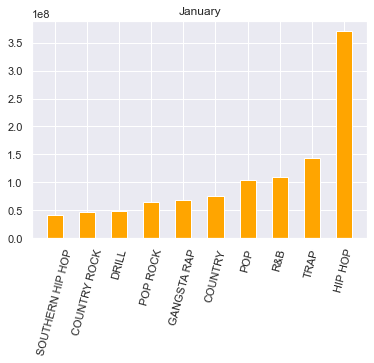

In [35]:
sns.set()
data = df_jan_top10.sort_values('Streams')
plt.bar('Genre', 'Streams', data = data, color ='orange',width = .5)
plt.xticks(rotation = 75)
plt.title('January');

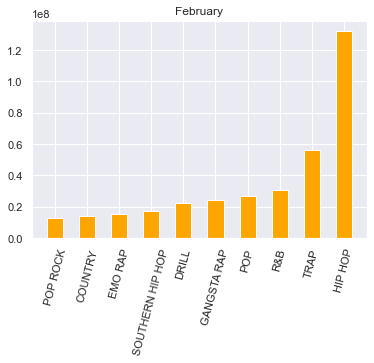

In [36]:
sns.set()
data = df_feb_top10.sort_values('Streams')
plt.bar('Genre', 'Streams', data = data,color ='orange',width = .5)
plt.xticks(rotation = 75)
plt.title('February');

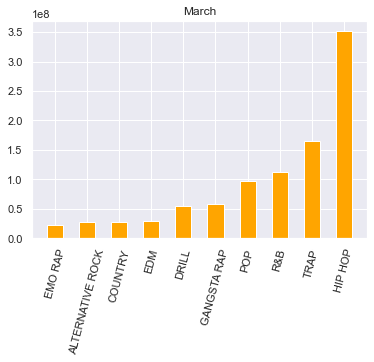

In [37]:
sns.set()
data = df_mar_top10.sort_values('Streams')
plt.bar('Genre', 'Streams', data = data,color ='orange',width = .5)
plt.xticks(rotation = 75)
plt.title('March');

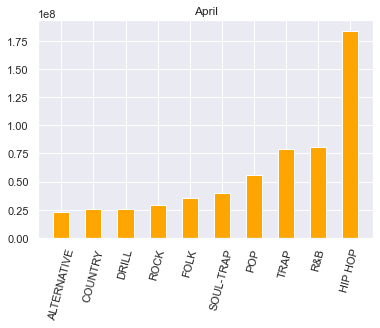

In [38]:
sns.set()
data = df_apr_top10.sort_values('Streams')
plt.bar('Genre', 'Streams', data = data,color ='orange',width = .5)
plt.xticks(rotation = 75)
plt.title('April');

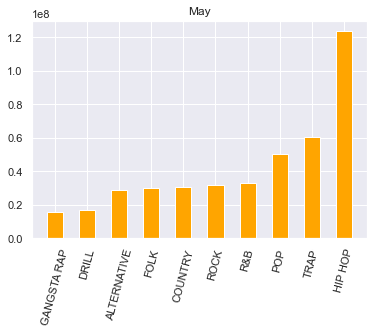

In [39]:
sns.set()
data = df_may_top10.sort_values('Streams')
plt.bar('Genre', 'Streams', data = data ,color ='orange',width = .5)
plt.xticks(rotation = 75)
plt.title('May');

In [40]:
top5_genres_streamed = df_mlc_and_genres_gr.nlargest(15,'Streams')
print(top5_genres_streamed)

     Usage Period        Genre    Streams
300    2021-01-01      HIP HOP  371113746
1619   2021-03-01      HIP HOP  351515145
2209   2021-04-01      HIP HOP  184022292
1941   2021-03-01         TRAP  164794316
616    2021-01-01         TRAP  143473703
946    2021-02-01      HIP HOP  132195488
2700   2021-05-01      HIP HOP  123628275
1829   2021-03-01          R&B  113264486
504    2021-01-01          R&B  110259890
458    2021-01-01          POP  104052425
1782   2021-03-01          POP   96580134
2354   2021-04-01          R&B   81015758
2436   2021-04-01         TRAP   78800267
154    2021-01-01      COUNTRY   75963242
265    2021-01-01  GANGSTA RAP   68568379


In [41]:
#create a list of top streaming genres and remove duplicates
top5_genres = top5_genres_streamed["Genre"].tolist()
top5_genres = list(dict.fromkeys(top5_genres))
top5_genres

['HIP HOP', 'TRAP', 'R&B', 'POP', 'COUNTRY', 'GANGSTA RAP']

In [42]:
top_streaming_genres = df_mlc_and_genres_gr[df_mlc_and_genres_gr['Genre'].isin(top5_genres)]
top_streaming_genres = top_streaming_genres.sort_values('Usage Period')
top_streaming_genres.head()

,Usage Period,Genre,Streams
154,2021-01-01,COUNTRY,75963242
265,2021-01-01,GANGSTA RAP,68568379
300,2021-01-01,HIP HOP,371113746
458,2021-01-01,POP,104052425
504,2021-01-01,R&B,110259890


In [43]:
#create a new column to just have month name
month = top_streaming_genres['Usage Period'].dt.month_name(locale = 'English')
top_streaming_genres['Month'] = month
top_streaming_genres.head()

,Usage Period,Genre,Streams,Month
154,2021-01-01,COUNTRY,75963242,January
265,2021-01-01,GANGSTA RAP,68568379,January
300,2021-01-01,HIP HOP,371113746,January
458,2021-01-01,POP,104052425,January
504,2021-01-01,R&B,110259890,January


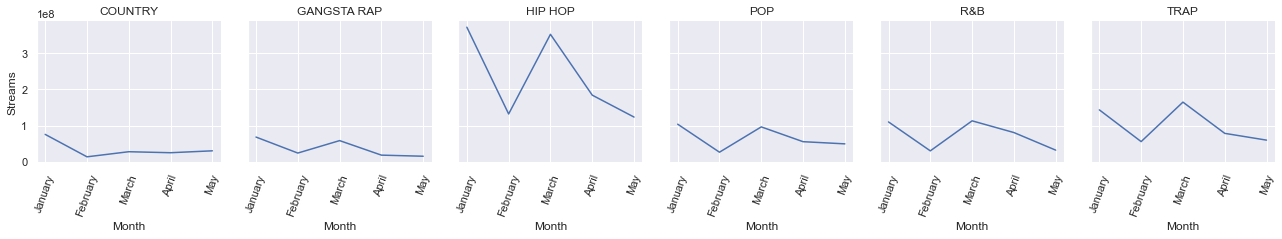

In [44]:
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True
sns.set_style("darkgrid")
g = sns.FacetGrid(top_streaming_genres, col='Genre')
g.map(sns.lineplot,"Month","Streams")
g.set_xticklabels(rotation=70)
g.set_titles(col_template = "{col_name}");